# Análise Exploratória e Preparação de Dados
## Estudo de Caso — Risco de Crédito

**Objetivo:**
Realizar uma análise exploratória completa e preparar uma base de dados para modelagem preditiva de risco de crédito, aplicando boas práticas de análise, visualização, tratamento de dados e documentação.

**Principais etapas:**
- Limpeza e validação dos dados
- Análise exploratória univariada e bivariada
- Geração de insights de negócio
- Tratamento de outliers e variáveis categóricas
- Análise de correlação
- Balanceamento da variável alvo
- Preparação da base para modelagem

**Autor:** Maylson
**Ferramentas:** Python, Pandas, Seaborn, Matplotlib, Scikit-learn

# 1. escopo da pré-modelagem
o objetivo nesta etapa do projeto é garantir que os dados estejam consistentes, compreensíveis e adequados para a etapa de modelagem, reduzindo risco de vieses ou interpretações incorretas

atividades previstas:
- Análise da estrutura da base de dados e dos tipos de variáveis
- Identificação e tratamento de valores ausentes (valores nulos)
- Análise de possíveis outliers e avaliação de sua relevância
- Avaliação das variáveis categóricas e necessidade de padronização

ressalta-se que as decisões tomadas nesta fase serão sempre justificadas com base em análises exploratórias e evidências extraídas dos dados, evitando alterações arbitrárias que possam comprometer o desempenho ou a interpretação do modelo.

## 1.1 Importação de bibliotecas e configuração do ambiente

## 1.2 Configuração Inicial

Nesta etapa são definidas as bibliotecas que serão utilizadas ao longo do projeto, bem como algumas configurações iniciais para padronização das análises e visualizações.
Essas configurações têm como objetivo garantir consistência na apresentação dos gráficos e facilitar a interpretação dos resultados durante a etapa exploratória e de modelagem.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# configuração visual do projeto

plt.style.use('default')
PALETA_PADRAO = ['#1f77b4', '#ffbf00']                                      # paleta padrão: azul + amarelo
sns.set_theme(style='whitegrid', context='paper', palette=PALETA_PADRAO)           # estilo geral
plt.rcParams['figure.figsize'] = (8, 5)                                                   # tamanho padrão dos gráficos

## 1.3  Carregamento da Base de Dados

Nesta etapa, a base de dados é carregada para o ambiente de análise.


In [2]:
df = pd.read_csv(r'E:\MAYLSON - CIENCIAS DE DADOS\Ciencia de Dados\projeto_M16\CREDIT_SCORE_PROJETO_PARTE1.csv', delimiter=';')
df.head(15)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


In [3]:
# número de linhas, número de colunas
df.shape

(164, 8)

In [4]:
# exibindo colunas, quantidade de nulos, tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


## 1.4 Análise Inicial da Estrutura da Base

A base de dados é composta por 164 registros e 8 variáveis.
Observa-se a presença de valores ausentes na variável Age, indicando a necessidade de tratamento, enquanto as demais colunas encontram-se completas.

Em relação aos tipos de dados, algumas variáveis que representam informações financeiras ou de score encontram-se classificadas como do tipo object, indicando a necessidade de avaliação e possível conversão durante a etapa de pré-processamento.


## 2. Pré-processamento e limpeza dos dados

## Análise da Variável Income

A variável Income representa o salário mensal dos indivíduos.
Inicialmente, observa-se que essa variável encontra-se classificada como do tipo object, indicando que seus valores não estão armazenados em formato numérico.

Antes de qualquer conversão, foi realizada uma inspeção dos valores presentes na variável, com o objetivo de compreender seu padrão de preenchimento e definir a estratégia de transformação mais adequada.


In [5]:
# verificando o padrão dos dados da variável Income
df['Income'].unique()

array(['50.000,00', '100.000,00', '75.000,00', '125.000,00', '150.000,00',
       '40.000,00', '60.000,00', '80.000,00', '105.000,00', '90.000,00',
       '135.000,00', '35.000,00', '55.000,00', '70.000,00', '95.000,00',
       '85.000,00', '30.000,00', '65.000,00', '115.000,00', '25.000,00',
       '45.000,00', '130.000,00', '155.000,00', '110.000,00',
       '140.000,00', '37.500,00', '57.500,00', '72.500,00', '32.500,00',
       '52.500,00', '67.500,00', '92.500,00', '82.500,00', '122.500,00',
       '27.500,00', '47.500,00', '62.500,00', '87.500,00', '77.500,00',
       '112.500,00', '117.500,00', '142.500,00', '160.000,00',
       '97.500,00', '145.000,00', '162.500,00', '120.000,00',
       '102.500,00', '137.500,00', '127.500,00', '82.000,00', '68.000,00'],
      dtype=object)

## transformação da Variável Income

A variável Income encontra-se originalmente armazenada como texto.

Considerando que essa variável representa uma informação quantitativa contínua, optou-se por convertê-la para o formato numérico, permitindo sua correta utilização nas análises exploratórias e na etapa de modelagem.


In [6]:
# padronizando variável Income
df['Income'] = (
    df['Income']
    .str.replace('.', '', regex=False)  # remove separador de milhar
    .str.replace(',', '.', regex=False)  # ajusta separador decimal
    .astype(float)
)

## Validação

In [7]:
# tipo da variável
df['Income'].dtype

dtype('float64')

In [8]:
# estatísticas da variável
df['Income'].describe()

count       164.000000
mean      83765.243902
std       32457.306728
min       25000.000000
25%       57500.000000
50%       83750.000000
75%      105000.000000
max      162500.000000
Name: Income, dtype: float64

## 2.1 Análise de Valores Nulos

Durante a análise inicial da base, foi identificada a presença de valores ausentes na variável Age.

Antes de definir a estratégia de tratamento, foi realizada uma análise exploratória da variável, com o objetivo de compreender sua distribuição e avaliar a abordagem mais adequada para lidar com os valores ausentes.


In [9]:
# total de linhas com valores ausentes
df['Age'].isnull().sum()

np.int64(34)

In [10]:
# distribuição e estatísticas da variável Age
df['Age'].describe()

count    130.000000
mean      37.507692
std        8.500110
min       25.000000
25%       30.000000
50%       36.000000
75%       45.000000
max       53.000000
Name: Age, dtype: float64

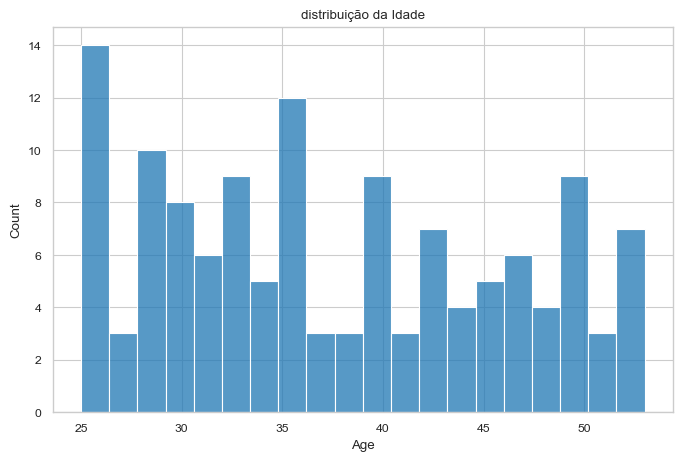

In [11]:
# Gráfico contendo a distribuição da idade dos indivíduos
sns.histplot(df['Age'], bins=20)
plt.title('distribuição da Idade')
plt.show()

A análise da distribuição da variável Age indicou ausência de valores extremos relevantes, com média e mediana próximas entre si. Ainda assim, optou-se pela imputação dos valores ausentes utilizando a mediana, por se tratar de uma medida robusta e amplamente adotada em contextos de modelagem de risco.


In [12]:
# imputação dos valores nulos pela mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

## Validação

In [13]:
df['Age'].isnull().sum()

np.int64(0)

## 2.2 Análise das Variáveis Categóricas

Nesta etapa, realizamos a análise das variáveis categóricas presentes na base de dados.
O objetivo é verificar se há valores digitados de forma incorreta que necessitem de tratamento antes da etapa de modelagem.

A análise dessas variáveis é fundamental em um problema de credit score, uma vez que características demográficas e socioeconômicas podem exercer influência direta no risco de inadimplência.


In [14]:
# verificação de consistência das variáveis categóricas
variaveis_categoricas = [       ### lista com as variáveis categóricas
    'Gender',
    'Education',
    'Marital Status',
    'Home Ownership',
    'Credit Score'
]

for var in variaveis_categoricas:                   ### laço de repetição para verificar de forma padronizada a distribuição de cada uma.
    print(f'\nDistribuição da variável {var}:')
    print(df[var].value_counts())


Distribuição da variável Gender:
Gender
Female    86
Male      78
Name: count, dtype: int64

Distribuição da variável Education:
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64

Distribuição da variável Marital Status:
Marital Status
Married    87
Single     77
Name: count, dtype: int64

Distribuição da variável Home Ownership:
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64

Distribuição da variável Credit Score:
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64


A análise das variáveis categóricas não identificou valores digitados de forma incorreta, inconsistências de nomenclatura ou categorias inválidas.
Todas as variáveis apresentaram categorias bem definidas e coerentes com o contexto do problema de credit score, não sendo necessário realizar ajustes ou tratamentos adicionais nesta etapa.

## 3. Análise Exploratória de Dados (EDA)

## 3.1 Análise e Tratamento de Outliers

Nesta etapa, foi realizada a análise univariada das variáveis numéricas com o objetivo de identificar a presença de possíveis outliers.
A identificação de valores extremos é importante, pois eles podem influenciar de forma significativa métricas estatísticas e o desempenho de modelos preditivos.

A análise foi conduzida por meio de estatísticas descritivas e visualizações gráficas, permitindo avaliar se os valores extremos representam erros nos dados ou comportamentos válidos dentro do contexto do problema de credit score.


In [15]:
# verificação dos dados da variável Age
df['Age'].describe()

count    164.000000
mean      37.195122
std        7.586619
min       25.000000
25%       31.750000
50%       36.000000
75%       43.000000
max       53.000000
Name: Age, dtype: float64

In [16]:
#método de IQR na variável Age
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

limite_inferior, limite_superior

outliers = df[
    (df['Age'] < limite_inferior) | (df['Age'] > limite_superior)
]

print('Limite de idade mínima: ', limite_inferior)
print('Limite de idade máxima: ', limite_superior)
print('número de Outliers: ', outliers.shape[0])

Limite de idade mínima:  14.875
Limite de idade máxima:  59.875
número de Outliers:  0


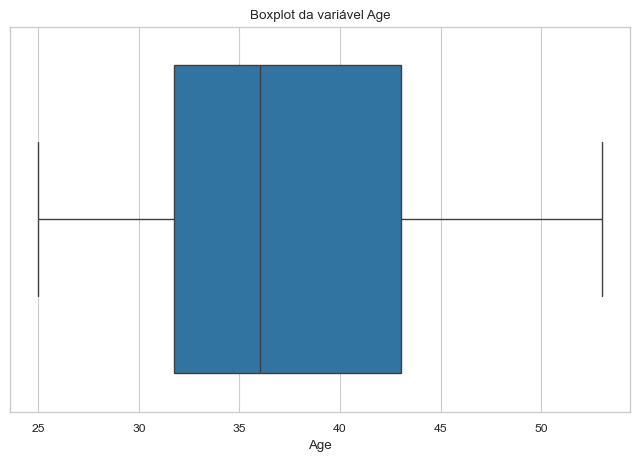

In [17]:
# gráfico boxplot para analisar a dispersão dos dados
plt.figure()
sns.boxplot(x=df['Age'])
plt.title('Boxplot da variável Age')
plt.show()

## Insights

A variável *Age* apresenta distribuição consistente, sem a presença de valores extremos que indiquem possíveis outliers relevantes.

In [18]:
# verificação de dados da variável Income
df['Income'].describe()

count       164.000000
mean      83765.243902
std       32457.306728
min       25000.000000
25%       57500.000000
50%       83750.000000
75%      105000.000000
max      162500.000000
Name: Income, dtype: float64

In [19]:
# método de IQR na variável Income
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

Outliers = df[
    (df['Income'] < limite_inferior) | (df['Income'] > limite_superior)
]

print('Limite de Income mínimo: ', limite_inferior)
print('Limite de Income máximo: ', limite_superior)
print('número de Outliers: ', outliers.shape[0])

Limite de Income mínimo:  -13750.0
Limite de Income máximo:  176250.0
número de Outliers:  0


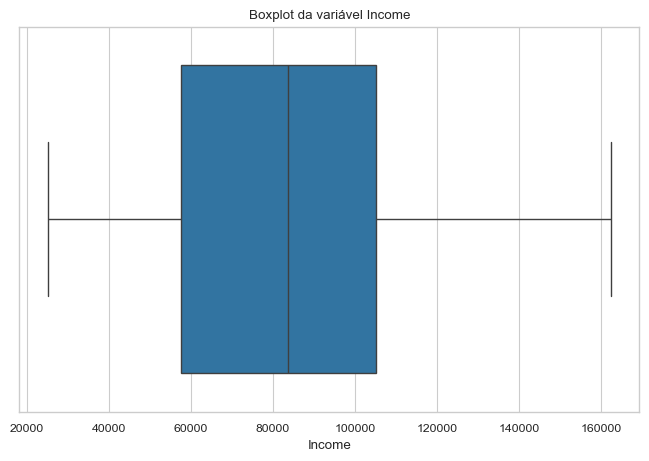

In [20]:
# Gráfico boxplot para analisar a dispersão dos dados
plt.figure()
sns.boxplot(x=df['Income'])
plt.title('Boxplot da variável Income')
plt.show()

## Insights
Os valores observados na variável *Income*, inclusive os mais elevados, são coerentes com o contexto do problema de crédito e representam perfis financeiros válidos.

**B) Agora realize a análise univariada para as variáveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico**

## 4. Análise Univariada das Variáveis Categóricas

essa etapa tem o objetivo de compreender a distribuição das categorias presentes na base de dados e identificar padrões relevantes para o problema de credit score.

A análise é conduzida por meio de visualizações gráficas e contagens de frequência, permitindo a extração de insights sobre o perfil dos indivíduos e seu possível impacto na concessão de crédito.


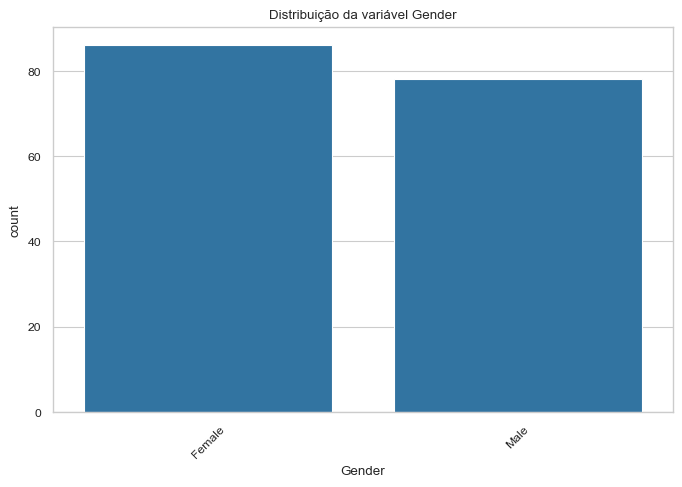

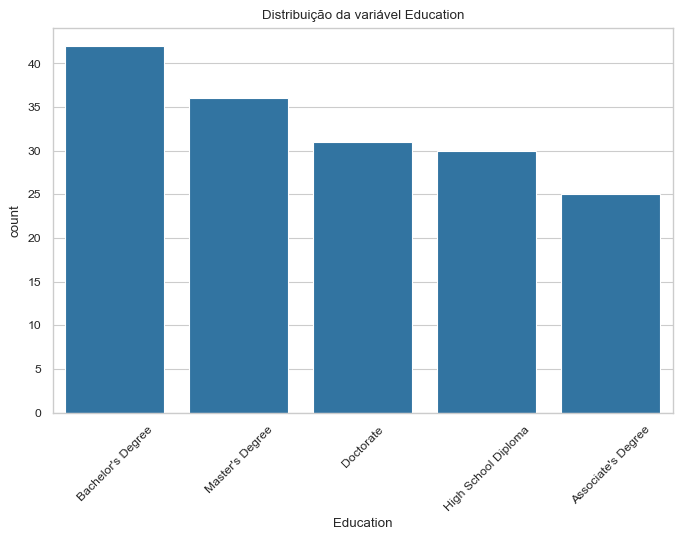

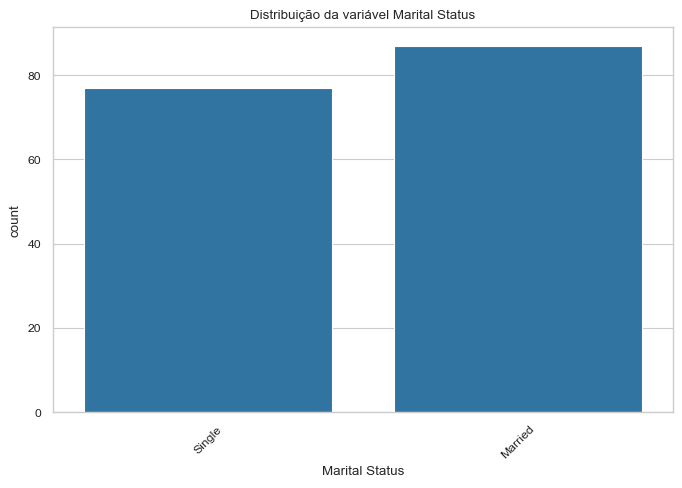

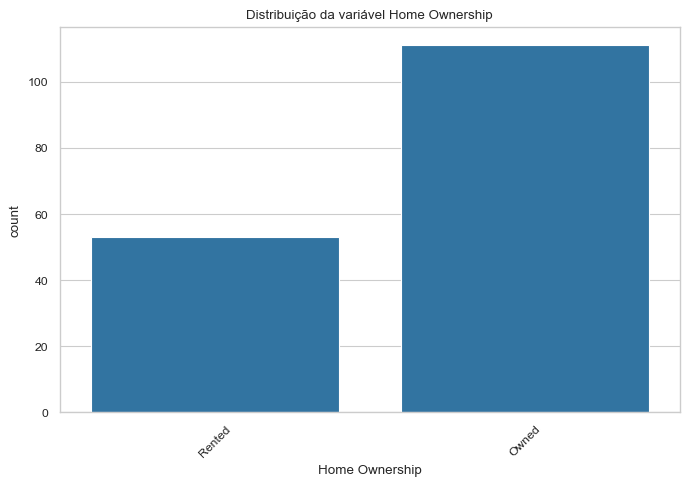

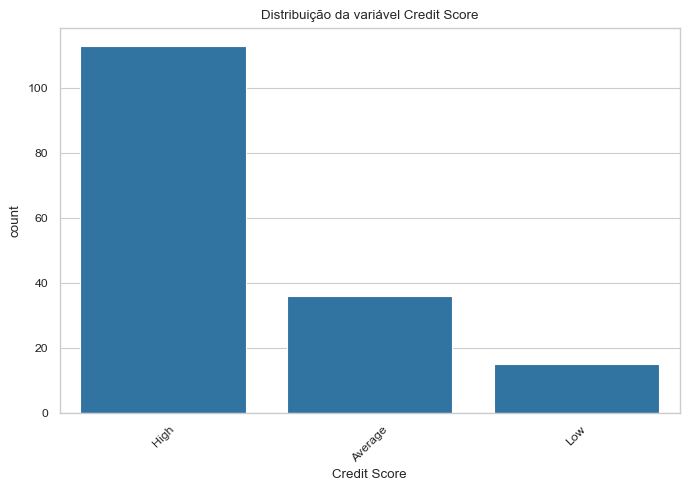

In [21]:
# loop de gráficos de contagem nas variáveis categóricas

variaveis_categoricas = [       # lista com as variáveis categóricas
    'Gender',
    'Education',
    'Marital Status',
    'Home Ownership',
    'Credit Score'
]

for var in variaveis_categoricas:           # laço de repetição para os gráficos de contagem
    plt.figure()
    sns.countplot(x=var, data=df)
    plt.title(f'Distribuição da variável {var}')
    plt.xticks(rotation=45)
    plt.show()

## Insights da Análise Univariada das Variáveis Categóricas

A variável *Gender* apresenta distribuição relativamente equilibrada entre os gêneros, com leve predominância do sexo feminino, não indicando um viés significativo de representação na base.

Em relação à escolaridade (*Education*), observa-se maior concentração de indivíduos com níveis de formação mais elevados, como Bachelor's, Master's e Doctorate, sugerindo um perfil educacional acima da média, potencialmente associado a maior estabilidade financeira.

A variável *Marital Status* também apresenta distribuição próxima ao equilíbrio, com leve predominância de indivíduos casados, o que pode refletir perfis com maior estabilidade familiar e financeira.

Quanto à posse de imóvel (*Home Ownership*), nota-se que a maioria dos indivíduos possui imóvel próprio, característica frequentemente associada a maior estabilidade patrimonial, sendo um fator relevante no contexto de análise de risco de crédito.

Por fim, a variável alvo (*Credit Score*) apresenta forte predominância da categoria *High*, indicando um desbalanceamento entre as classes, aspecto que deverá ser considerado na etapa de modelagem para evitar viés nos resultados.


Concluindo a análise univariada das variáveis numéricas, não foram identificados outliers que representassem erros ou inconsistências nos dados.

Dessa forma, nenhuma remoção ou tratamento dos outliers foi necessário nesta etapa, preservando a integridade das informações para a fase de modelagem.

## 5. Análise Bivariada

Nesta etapa, o objetivo é analisar a relação entre pares de variáveis, buscando identificar padrões, associações e possíveis influências entre características dos clientes e o *Credit Score*.

A análise bivariada permite avaliar hipóteses relevantes para o problema de concessão de crédito, auxiliando na compreensão dos fatores que podem impactar o perfil financeiro dos indivíduos e fornecendo subsídios para a etapa de modelagem.

### Hipótese 1: Existe relação entre Idade e o Estado Civil?

Esta análise busca verificar se existe relação entre a idade dos indivíduos e seu estado civil.
Para isso, foi analisada a distribuição da variável *Age* em função das categorias da variável *Marital Status*


Distribuição de Idade por Estado Civil


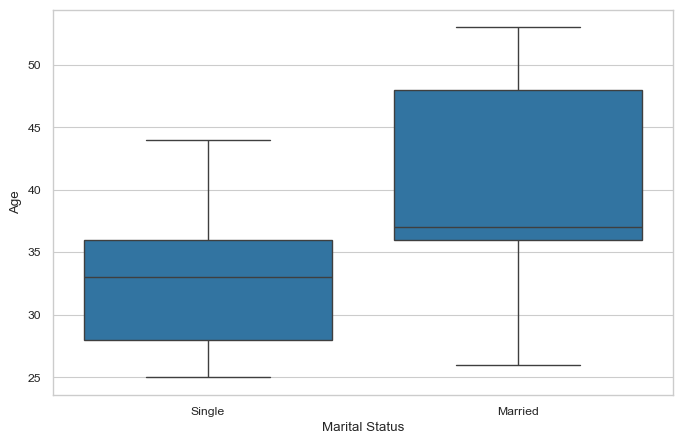

In [22]:
# gráfico boxplot responde exatamente a essa hipótese
plt.figure()
sns.boxplot(
    data=df,
    x='Marital Status',
    y='Age'
)
print('Distribuição de Idade por Estado Civil')
plt.show()

### Insight

O estado civil pode atuar como uma variável indiretamente associada à idade,
o que sugere que essa característica pode capturar diferenças de estágio de vida relevantes para análises de risco de crédito.


### Hipótese 2: Qual a relação entre o score de crédito e o nível de escolaridade?

Esta análise tem como objetivo verificar se diferentes níveis de escolaridade estão associados a variações no score de crédito dos indivíduos, identificando possíveis padrões de risco entre os grupos educacionais.


Distribuição Percentual do Score de Crédito por Nível de Escolaridade


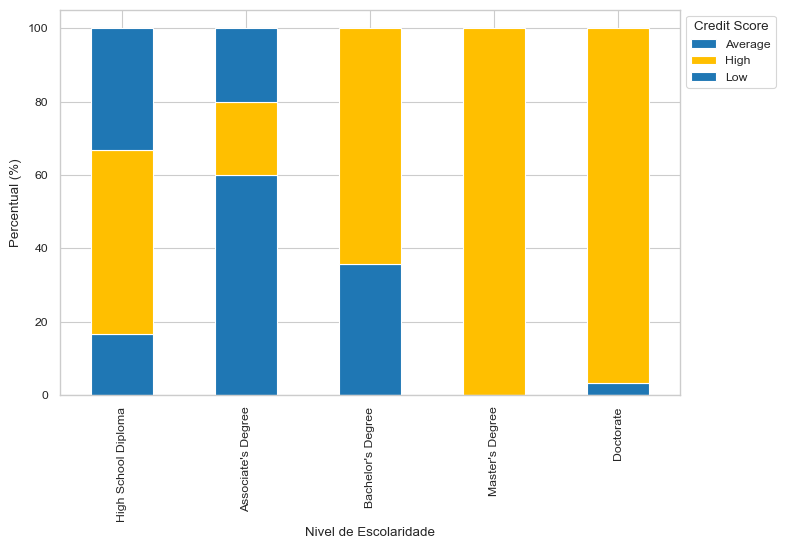

In [23]:
# definindo a ordem dos níveis de escolaridade
ordem_educacao = [
    'High School Diploma',
    "Associate's Degree",
    "Bachelor's Degree",
    "Master's Degree",
    'Doctorate'
]

educ_score_pct = pd.crosstab(               ### tabela cruzada normalizada (percentual por linha)
    df['Education'],
    df['Credit Score'],
    normalize='index'
) * 100

# reordenando a tabela
educ_score_pct = educ_score_pct.loc[ordem_educacao]

educ_score_pct.plot(kind='bar', stacked=True)                                   ### gráfico de barras empilhadas, ideal para comparar categorias
print('Distribuição Percentual do Score de Crédito por Nível de Escolaridade')
plt.ylabel('Percentual (%)')
plt.xlabel('Nivel de Escolaridade')
plt.legend(title='Credit Score', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Insights

A análise evidencia uma associação clara entre nível de escolaridade e score de crédito.
Observa-se que indivíduos com maior formação acadêmica apresentam elevada concentração de scores classificados como *High*, chegando a 100% no grupo com *Master’s Degree* e a 96,77% no grupo com *Doctorate*.

Em contrapartida, níveis educacionais mais baixos, como *High School Diploma* e *Associate’s Degree*, concentram maiores proporções de scores *Average* e *Low*, indicando maior exposição ao risco de crédito.

Esse padrão sugere que a escolaridade pode refletir características socioeconômicas e comportamentais relevantes, sendo uma variável potencialmente importante para modelos de credit score.


## Hipótese 3 - o salário parece influenciar na idade?

Essa análise tem como objetivo investigar se existe relação entre a idade dos indivíduos e seu nível de renda, buscando identificar padrões que indiquem aumento ou variação do salário ao longo das faixas etárias.


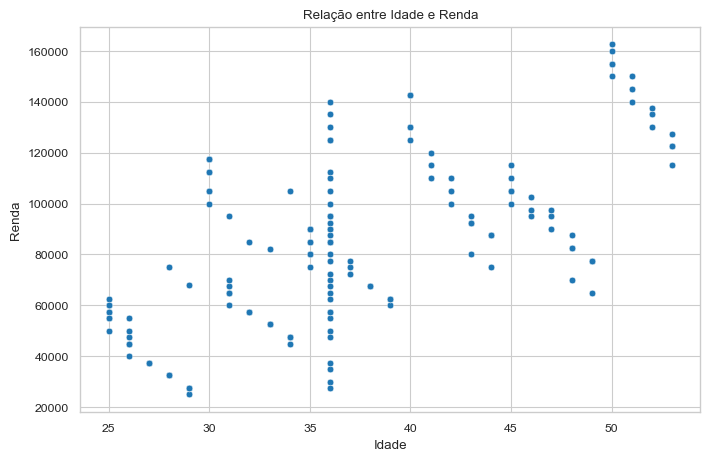

In [24]:
# Gráfico de dispersão: idade x renda
plt.figure()
sns.scatterplot(
    data=df,
    x='Age',
    y='Income',
)
plt.title('Relação entre Idade e Renda')
plt.xlabel('Idade')
plt.ylabel('Renda')
plt.show()

In [25]:
# correlação numérica complementar
df[['Age', 'Income']].corr()

,Age,Income
Age,1.000000,0.621492
Income,0.621492,1.000000


## Insights

A análise idade x renda evidenciou uma relação positiva moderadamente forte, com coeficiente de correlação de aproximadamente 0,62.

O gráfico de dispersão revelou uma tendência crescente da renda conforme o aumento da idade, indicando que indivíduos mais velhos tendem, em média, a apresentar rendas mais elevadas. No entanto, observou-se elevada dispersão dos valores em praticamente todas as faixas etárias, o que demonstra que pessoas da mesma idade podem possuir níveis de renda bastante distintos.

Embora rendas mais altas sejam mais frequentes a partir de aproximadamente 36 anos, não foi identificado um ponto de ruptura claro que permita segmentações rígidas por idade.

De forma geral, os resultados indicam que a idade exerce influência sobre a renda, mas não é um fator determinístico isolado. Assim, essa variável deve ser utilizada de forma complementar no modelo de credit score, em conjunto com outras características socioeconômicas, para uma avaliação mais precisa do risco de crédito.


### Hipótese 4: O salário parece influenciar no score de crédito?

O objetivo desta análise é investigar se há associação entre a renda dos indivíduos (*Income*) e seu respectivo *Credit Score*.

Busca-se compreender se níveis mais elevados de renda estão relacionados a scores de crédito mais altos, bem como identificar possíveis diferenças na distribuição da renda entre as categorias de score (Low, Average e High).

Essa análise é fundamental para avaliar o poder explicativo da variável renda no contexto de modelos de concessão de crédito.


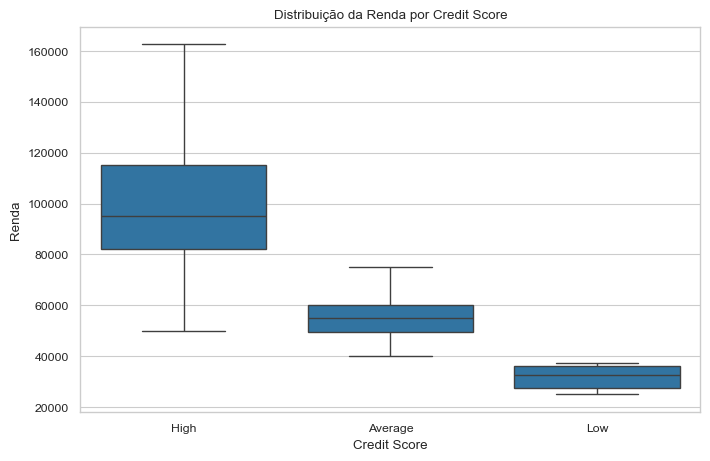

In [26]:
# gráfico de caixa - income x credit score
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Credit Score',
    y='Income'
)
plt.title('Distribuição da Renda por Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Renda')
plt.show()

### Insights

A análise da distribuição da renda por categoria de Credit Score evidenciou diferenças claras e consistentes entre os grupos.

Indivíduos classificados com Credit Score *High* apresentam rendas significativamente mais elevadas. Essa maior variabilidade indica perfis financeiros diversos dentro do grupo de alto score, incluindo rendas médias e altas.

O grupo *Average* concentra-se em faixas intermediárias de renda e distribuição mais compacta, sugerindo maior homogeneidade financeira em comparação ao grupo *High*.

Já os indivíduos com Credit Score *Low* apresentam rendas substancialmente menores e baixa dispersão, indicando um grupo mais homogêneo e concentrado em faixas salariais reduzidas.

A separação visual entre as caixas e a diferença progressiva das medianas sugerem uma forte associação positiva entre renda e score de crédito. De modo geral, à medida que o nível de renda aumenta, observa-se uma tendência clara de melhora no Credit Score.

Esses resultados indicam que a variável *Income* possui elevado poder discriminante e tende a ser uma das variáveis mais relevantes para a modelagem de concessão de crédito.


### Hipótese 5: Clientes com casa própria tendem a apresentar Credit Score mais elevado?

O objetivo desta análise é investigar se a condição de moradia do indivíduo (*Home Ownership*) está associada ao seu Credit Score.

Busca-se avaliar se clientes que possuem imóvel próprio apresentam maior concentração em categorias de score mais elevadas quando comparados àqueles que residem em imóveis alugados. Essa análise é relevante no contexto de concessão de crédito, uma vez que a posse de um imóvel pode refletir maior estabilidade financeira.

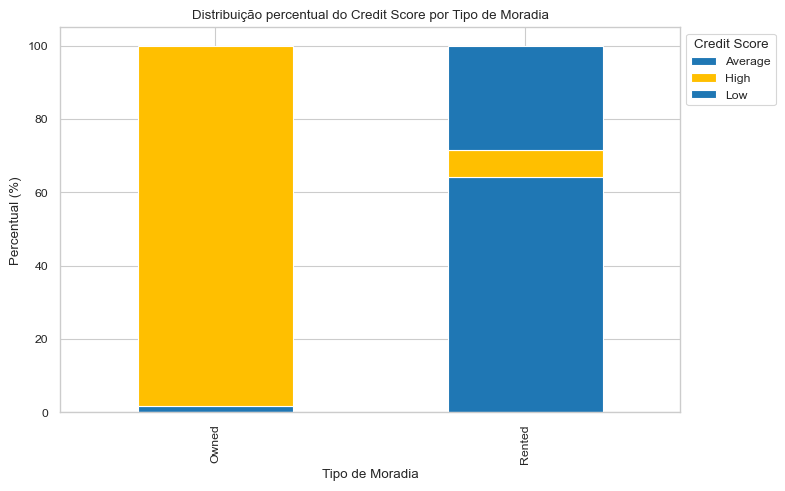

In [27]:
# tabela cruzada + gráfico de barras empilhadas em percentual
tabela = pd.crosstab(
    df['Home Ownership'],
    df['Credit Score'],
    normalize='index'
) * 100

tabela.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)
plt.title('Distribuição percentual do Credit Score por Tipo de Moradia')
plt.xlabel('Tipo de Moradia')
plt.ylabel('Percentual (%)')
plt.legend(title='Credit Score', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


### Insights

A análise da distribuição percentual do Credit Score por tipo de moradia revelou diferenças expressivas entre os grupos.

Entre os indivíduos que possuem imóvel próprio (*Owned*), observa-se uma concentração extremamente elevada de Credit Score *High*, representando aproximadamente 98% dos casos, com praticamente ausência de scores baixos. Esse padrão sugere forte associação entre posse de imóvel e melhor classificação de crédito, possivelmente refletindo maior estabilidade financeira e capacidade de honrar compromissos.

Por outro lado, os indivíduos que residem em imóveis alugados (*Rented*) apresentam um perfil significativamente distinto. Nesse grupo, a maior parte concentra-se nas categorias *Average* e *Low*, com destaque para uma proporção relevante de scores baixos, indicando maior risco de crédito relativo.

A clara separação entre as distribuições reforça a hipótese de que a condição de moradia está associada ao Credit Score. Assim, a variável *Home Ownership* demonstra alto potencial explicativo e tende a ser uma variável importante em modelos de concessão de crédito.

**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

### Hipótese 6: O estado civil pode influenciar o Credit Score?

O objetivo desta análise é investigar se o estado civil do indivíduo (*Marital Status*) apresenta associação com seu Credit Score.

Busca-se avaliar se clientes casados tendem a concentrar-se em categorias de score mais elevadas quando comparados a clientes solteiros. Essa análise é relevante no contexto de crédito, uma vez que o estado civil pode refletir maior estabilidade financeira e previsibilidade de despesas.

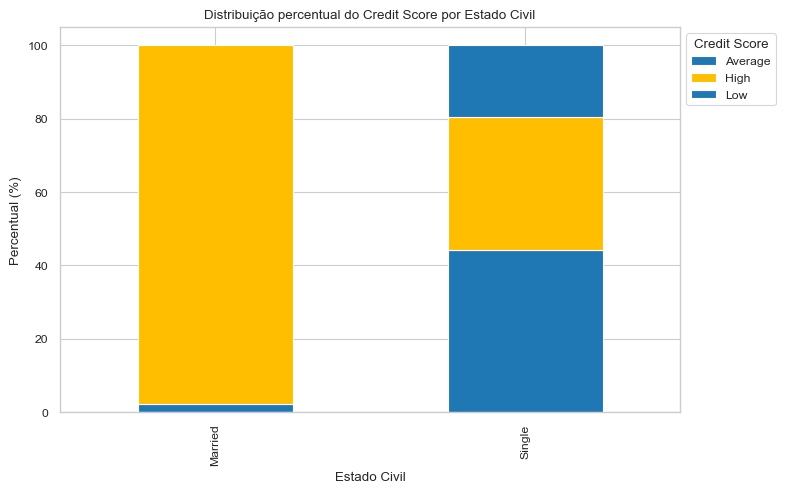

In [28]:
# tabela cruzada + gráfico de barras empilhadas em percentual
tabela = pd.crosstab(
    df['Marital Status'],       # tabela cruzada
    df['Credit Score'],
    normalize='index'
) * 100
tabela.plot(                            # gráfico de barras empilhadas
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)
plt.title('Distribuição percentual do Credit Score por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Percentual (%)')
plt.legend(title='Credit Score', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()



### Insights

A análise da distribuição percentual do Credit Score por estado civil revelou diferenças significativas entre os grupos.

Entre os indivíduos casados, observa-se uma concentração extremamente elevada de Credit Score *High*, representando aproximadamente 97,7% dos casos, com ausência de scores baixos. Esse padrão sugere maior estabilidade financeira nesse grupo, possivelmente associada à renda combinada e maior previsibilidade de despesas.

Por outro lado, os indivíduos solteiros apresentam uma distribuição mais heterogênea de scores. Nesse grupo, apenas cerca de 36% possuem Credit Score *High*, enquanto uma parcela relevante concentra-se nas categorias *Average* e *Low*, indicando maior variabilidade e risco relativo.

A separação clara entre os perfis reforça a hipótese de que o estado civil está associado ao Credit Score. Dessa forma, a variável *Marital Status* mostra-se relevante para a análise de risco de crédito e pode contribuir significativamente para modelos de concessão de crédito quando combinada com outras variáveis socioeconômicas.


### Hipótese 7: O número de filhos pode influenciar o Credit Score?

O objetivo desta análise é investigar se o número de filhos do indivíduo (*Number of Children*) apresenta associação com seu Credit Score.

Busca-se compreender se clientes com maior número de dependentes tendem a apresentar scores de crédito diferentes, considerando que o aumento de responsabilidades financeiras pode impactar a capacidade de pagamento e o risco de crédito.

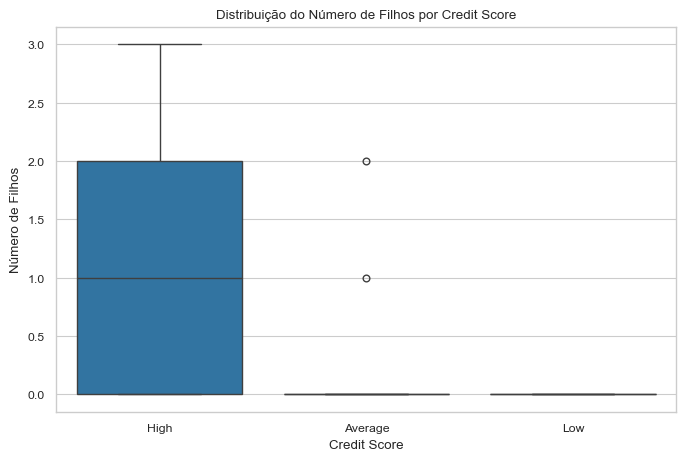

In [29]:
# Gráfico de caixa
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Credit Score',
    y='Number of Children',
    data=df
)

plt.title('Distribuição do Número de Filhos por Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Número de Filhos')
plt.show()


## insights iniciais

a variável possui poucos valores possíveis e alguns grupos têm perfil muito homogêneo, portanto não há dispersão suficiente para formar uma “caixa”

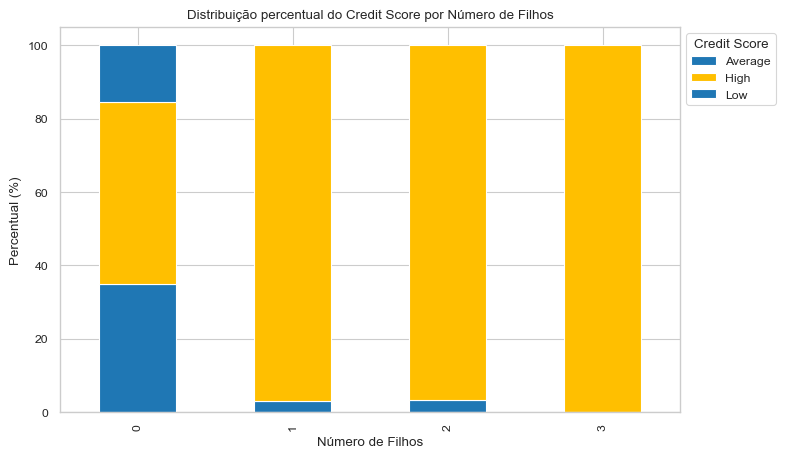

In [30]:
# gráfico complementar: barras empilhadas em percentual
tabela = pd.crosstab(
    df['Number of Children'],           # tabela cruzada
    df['Credit Score'],
    normalize='index'
) * 100

tabela.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5)
)

plt.title('Distribuição percentual do Credit Score por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Percentual (%)')
plt.legend(title='Credit Score', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Insights finais

A análise da distribuição percentual do Credit Score por número de filhos revelou um padrão consistente entre os grupos.

Indivíduos sem filhos apresentam uma distribuição mais heterogênea de scores, com maior concentração nas categorias *Average* e *Low*. Esse grupo demonstra maior variabilidade de risco de crédito quando comparado aos demais.

Por outro lado, à medida que o número de filhos aumenta, observa-se uma concentração crescente de Credit Score *High*. Indivíduos com um ou mais filhos apresentam predominância quase total de scores elevados, chegando a 100% de *High* para clientes com três filhos.

Esse comportamento sugere que, nesta base de dados, clientes com maior número de dependentes tendem a apresentar perfis financeiros mais sólidos. Contudo, é importante destacar que esse padrão pode refletir efeitos indiretos, como maior idade, renda ou estabilidade profissional, e não necessariamente uma relação causal direta entre número de filhos e score de crédito.

Assim, a variável *Number of Children* mostra associação com o Credit Score, porém deve ser interpretada com cautela e utilizada de forma complementar no modelo de crédito.


### Hipótese 8: O número de filhos pode influenciar a renda dos clientes?

O objetivo desse análise é investigar se clientes com diferentes quantidades de filhos apresentam diferenças na distribuição de renda.

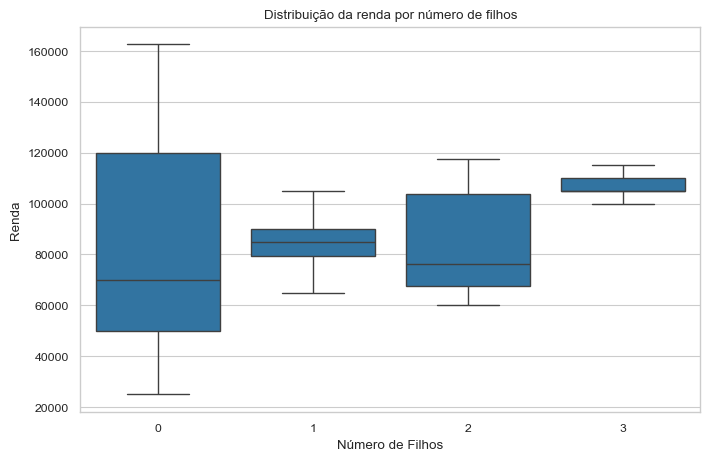

In [31]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x='Number of Children',
    y='Income',
    showfliers=False                                # sem outliers visuais
)
plt.title('Distribuição da renda por número de filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Renda')
plt.show()

## Insights

A análise indica que o número de filhos está associado a diferenças no padrão de renda dos clientes, principalmente em termos de dispersão.

Clientes sem filhos apresentam a maior variabilidade de renda, sugerindo perfis financeiros bastante heterogêneos. Já clientes com um ou dois filhos possuem rendas mais concentradas, indicando maior homogeneidade financeira nesses grupos.

Para clientes com três filhos, a renda mostrou-se altamente concentrada, porém o baixo número de observações limita conclusões mais robustas.

De forma geral, observa-se que o número de filhos influencia a distribuição da renda, aspecto relevante para análises de perfil financeiro e avaliação de risco de crédito.


## 6. Análise de Correlação

O objetivo desta etapa é avaliar o grau de associação linear entre as variáveis numéricas do conjunto de dados, identificando possíveis relações fortes, redundâncias de informação e padrões relevantes para a construção do modelo de credit score.

A análise de correlação auxilia na seleção de atributos, evitando o uso de variáveis altamente correlacionadas entre si, o que pode impactar negativamente a interpretabilidade e a estabilidade do modelo.

In [32]:
#seleção das variáveis numéricas
variaveis_numericas = ['Age', 'Income', 'Number of Children']

df_corr = df[variaveis_numericas].corr()

df_corr

,Age,Income,Number of Children
Age,1.000000,0.621492,0.072432
Income,0.621492,1.000000,0.084547
Number of Children,0.072432,0.084547,1.000000


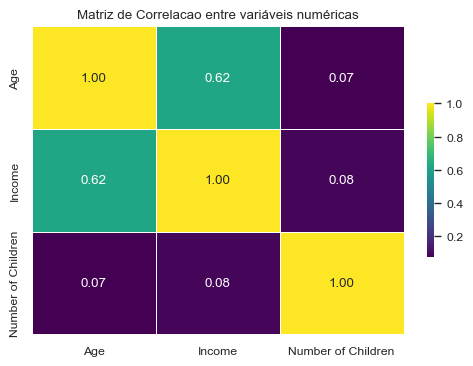

In [33]:
# Gráfico da matriz de correlação
plt.figure(figsize=(6,4))
sns.heatmap(
    df_corr,
    annot=True,                     # mostra os valores da correlação dentro da célula
    cmap='viridis',                     # paleta de cores
    fmt='.2f',                              # formato com duas casas decimais
    cbar_kws={'shrink': 0.5},                   # legenda em tamanho reduzido
    linewidths=0.5                                  # linha fina entre as células
)
plt.title('Matriz de Correlacao entre variáveis numéricas')
plt.show()

### Insights da Análise de Correlação

A análise de correlação revelou uma associação positiva moderada entre idade e renda (0,62), indicando que clientes mais velhos tendem a apresentar rendas mais elevadas. Essa relação faz sentido com o contexto econômico e sugere que ambas as variáveis contribuem de forma complementar para a modelagem do risco de crédito.

Não foram identificadas correlações excessivamente altas entre as variáveis analisadas, reduzindo o risco de colinearidade e reforçando a adequação do conjunto de variáveis numéricas para a etapa de modelagem.


## 7. tratamento das Variáveis Categóricas

Nesta etapa, todas as variáveis categóricas do dataset foram transformadas em formato numérico para que possam ser utilizadas no desenvolvimento do modelo de credit score.

**Decisões de transformação:**
- Variáveis **binárias** (como *Gender*, *Marital Status* e *Home Ownership*) foram codificadas com **Label Encoding**, variando entre 0 e 1, o que é suficiente para o modelo interpretar corretamente essas informações.
- Variáveis **ordinais** (como *Education* e *Credit Score*) também foram codificadas com **Label Encoding**, preservando a ordem natural das categorias. Isso permite que o modelo reconheça que níveis mais altos representam maior escolaridade ou melhor score.



In [34]:
# preparação das variáveis categóricas
from sklearn.preprocessing import LabelEncoder

categoricas = [             # todas as variáveis categóricas do DataSet
    'Gender',
    'Marital Status',
    'Home Ownership',
    'Education',
    'Credit Score',
]

# criando uma instância do Label Encoder
le = LabelEncoder()

for col in categoricas:                     # laço de repetição
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,0,50000.0,1,1,0,1,1
1,30.0,1,100000.0,4,0,2,0,1
2,35.0,0,75000.0,2,0,1,0,1
3,40.0,1,125000.0,3,1,0,0,1
4,45.0,0,100000.0,1,0,3,0,1


## Conclusão dessa etapa

Após a codificação, todas as variáveis categóricas estão representadas numericamente:

- Binárias → 0/1
- Ordinais → números preservando a ordem

Essa abordagem mantém a integridade da informação, evita redundâncias e deixa o dataset pronto para a modelagem. O tratamento aplicado é consistente com boas práticas de ciência de dados e garante que o modelo possa interpretar corretamente todas as variáveis categóricas.

## 8. Análise de Correlação entre Todas as Variáveis

O objetivo desta etapa é examinar a **força e direção das relações lineares** entre todas as variáveis do dataset, agora que todas estão numéricas, incluindo as variáveis categóricas transformadas com LabelEncoder.

Essa análise permite:

- Identificar se existe **forte correlação** entre variáveis numéricas e/ou codificadas;
- Detectar **possíveis redundâncias** que podem influenciar a modelagem;
- Observar relações entre variáveis que podem gerar **insights adicionais** para o desenvolvimento do modelo de credit score.

Para isso, será gerada uma **matriz de correlação** visualizada por um **heatmap**, facilitando a interpretação das relações entre todas as variáveis do dataset.

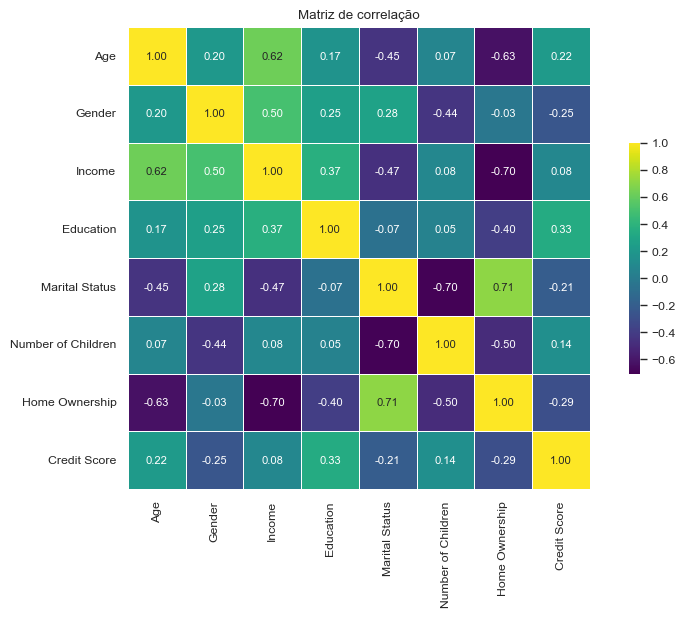

In [35]:
# calculando a correlação entre todas as variáveis
df_corr_total = df.corr()


plt.figure(figsize=(10,6))
sns.heatmap(                        # gráfico mapa de calor
    df_corr_total,
    annot=True,                         # valores nas células
    cmap='viridis',                         # paleta de cores
    cbar_kws={'shrink': 0.5},                   # legenda reduzida
    linewidths=0.5,                                 # linhas entre os valores
    annot_kws={'size': 8},                             # tamanho da fonte
    square=True,                                            # células quadradas
    fmt='.2f',                                                  # duas casas decimais
)
plt.title('Matriz de correlação')
plt.show()

## Insights

A análise de correlação entre todas as variáveis do dataset revela relações interessantes e coerentes com o contexto do problema de crédito:

- **Relações fortes ou moderadas:**
  - `Marital Status` e `Home Ownership` apresentam forte correlação positiva (0.71), indicando que clientes casados tendem a possuir imóveis próprios.
  - `Income` e `Home Ownership` possuem forte correlação negativa (-0.70), refletindo que clientes com maior renda não necessariamente têm casa própria neste dataset.
  - `Age` correlaciona moderadamente com `Income` (0.62) e negativamente com `Home Ownership` (-0.63), sugerindo que perfis mais jovens podem ter rendas menores e ainda estar em processo de aquisição de imóveis.
  - `Education` e `Credit Score` apresentam correlação positiva moderada (0.33), indicando que maior nível educacional tende a se associar a scores mais altos.

- **Relações fracas:**
  - `Gender` apresenta baixa correlação com todas as variáveis, mostrando que gênero não influencia diretamente o score ou renda neste dataset.
  - `Number of Children` possui correlações moderadas negativas com algumas variáveis, mas nenhuma relação muito forte.

## 9. Separação da Base em Treino e Teste

O objetivo desta etapa é dividir o dataset em conjuntos de **treinamento** e **teste**, garantindo que o modelo possa ser treinado em parte dos dados e avaliado em dados que ele ainda não viu.

Essa separação é fundamental para:
- Evitar **overfitting**, onde o modelo decoraria os dados em vez de aprender padrões gerais.
- Permitir uma **avaliação realista** da performance do modelo em dados novos.

Adotaremos a proporção clássica de **70% para treino** e **30% para teste**, mantendo a variável alvo (`Credit Score`) como referência para classificação.

In [36]:
# importando função treino e teste
from sklearn.model_selection import train_test_split

# separando em features (x) e o alvo (y)
X = df.drop('Credit Score', axis=1)             # variáveis preditoras, exceto 'Credit Score'
y = df['Credit Score']                              #Variável alvo

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,                  # paramêtro de 30% para teste, 70% para treino
    stratify=y,                         # mantem a proporção das classes do alvo iguais
    random_state=42                         # sempre que rodar com o mesmo número, a divisão será igual
)

# Conferindo o tamanho das bases
print("Tamanho de X_train:", X_train.shape)
print("Tamanho de X_test:", X_test.shape)
print("Tamanho de y_train:", y_train.shape)
print("Tamanho de y_test:", y_test.shape)

Tamanho de X_train: (123, 7)
Tamanho de X_test: (41, 7)
Tamanho de y_train: (123,)
Tamanho de y_test: (41,)


## Conclusão dessa etapa

dividimos o dataset em **conjuntos de treino e teste** para permitir que o modelo aprenda com parte dos dados e seja avaliado em dados que ainda não viu.

Dessa forma, garantimos que os dados estão prontos para a etapa de **modelagem**, mantendo **integridade e representatividade** da variável alvo.


## 10. Análise de Balanceamento da Variável Alvo

Nesta etapa, analisamos a variável **Credit Score** com o objetivo de:

- Verificar se as classes estão balanceadas ou desbalanceadas
- Identificar possíveis riscos de viés no treinamento do modelo

Para isso, utilizamos um **gráfico de contagem (countplot)**, por ser a forma mais adequada de visualizar a frequência absoluta de classes categóricas.

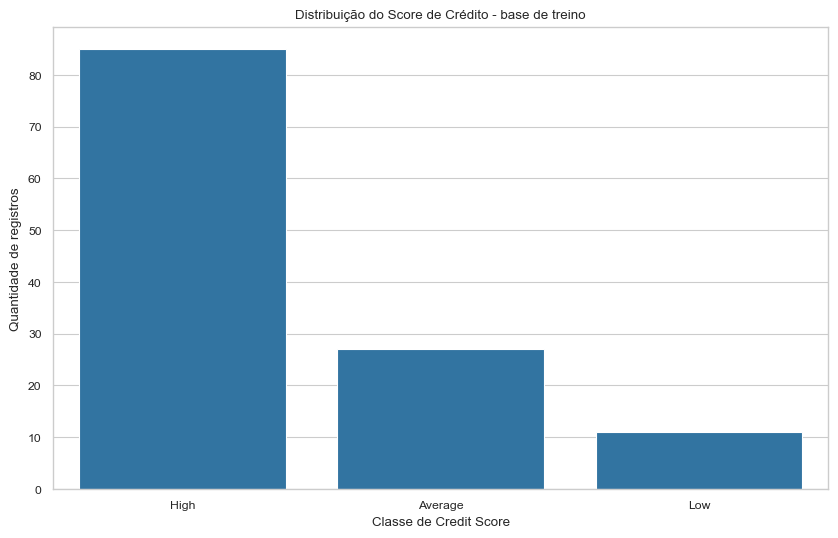

In [37]:
# Gráfico de contagem
plt.figure(figsize=(10,6))
sns.countplot(
    x=y_train.map({
        0: 'Average',
        1: 'High',
        2: 'Low'
    })
)

plt.title('Distribuição do Score de Crédito - base de treino')
plt.xlabel('Classe de Credit Score')
plt.ylabel('Quantidade de registros')
plt.show()

## conclusão dessa etapa

A análise da distribuição da variável alvo revelou um **desbalanceamento entre as classes**.

A classe **High** possui aproximadamente **113 registros**, enquanto a classe **Average** contem cerca de **36**, e a classe **Low** possui apenas **15 registros**.

Esse cenário indica a presença de uma **classe minoritária relevante (Low)**, o que pode impactar o desempenho dos modelos preditivos, especialmente na identificação de clientes com maior risco de inadimplência.

## 11. Balanceamento da Variável Alvo

Nesta etapa, aplicamos a técnica de **SMOTE** com o objetivo de tratar o desbalanceamento identificado na variável alvo *Credit Score*.

A presença de classes minoritárias, especialmente aquelas associadas a maior risco de crédito, pode comprometer o desempenho dos modelos preditivos, levando a vieses na classificação.

O SMOTE será aplicado **exclusivamente na base de treino**, gerando observações sintéticas da classe minoritária e preservando a base de teste intacta, garantindo assim uma avaliação justa e confiável do modelo.

In [38]:
# importação Smote
from imblearn.over_sampling import SMOTE

# criando uma instância do Smote
smote = SMOTE(random_state=42)

# aplicando o balanceamento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# conferindo os novos tamanhos
print("Depois do SMOTE:", y_train_smote.value_counts())

Depois do SMOTE: Credit Score
1    85
0    85
2    85
Name: count, dtype: int64


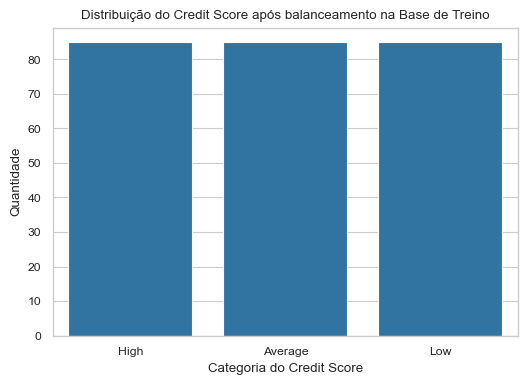

In [39]:
# Gráfico de contagem após o balanceamento
plt.figure(figsize=(6,4))

sns.countplot(
    x=y_train_smote.map({
        0: 'Average',
        1: 'High',
        2: 'Low'
    })
)

plt.title('Distribuição do Credit Score após balanceamento na Base de Treino')
plt.xlabel('Categoria do Credit Score')
plt.ylabel('Quantidade')
plt.show()

## 12. Conclusão do Balanceamento

Como resultado, todas as classes passaram a possuir **85 registros**, garantindo uma distribuição equilibrada entre as categorias *Average*, *High* e *Low*. Esse balanceamento reduz o viés do modelo em favor da classe majoritária e melhora a capacidade de aprendizado sobre perfis de maior risco de crédito.

A base de teste foi mantida inalterada, assegurando que a avaliação futura do modelo reflita um cenário realista e confiável.

Com essa etapa concluída, o conjunto de dados encontra-se devidamente preparado para a fase de modelagem, permitindo o treinamento de algoritmos de classificação de forma mais justa e robusta.


## 13. Conclusão Geral

Este estudo realizou uma análise exploratória completa sobre um conjunto de dados de risco de crédito, indo além da simples geração de gráficos e estatísticas descritivas. Ao longo do trabalho, foi possível identificar padrões relevantes entre variáveis socioeconômicas e o score de crédito, sempre com cuidado para não confundir correlação com causalidade.

A renda se mostrou uma variável central no comportamento do score de crédito, apresentando relação positiva consistente com idade, escolaridade e posse de imóvel. Variáveis como estado civil e número de filhos também apresentaram associações relevantes, reforçando a importância de analisar o perfil do cliente de forma multidimensional.

O tratamento de outliers foi realizado de forma conservadora e consciente, preservando valores extremos que representam perfis financeiros legítimos, prática essencial em contextos financeiros. As variáveis categóricas foram tratadas com critérios claros, respeitando suas naturezas binária, ordinal e nominal, preparando a base de forma adequada para modelos preditivos.

A variável alvo apresentou desbalanceamento significativo, tratado corretamente por meio da técnica SMOTE aplicada exclusivamente à base de treino, garantindo maior justiça e robustez para futuras etapas de modelagem.

Como próximos passos, este trabalho está pronto para a aplicação de modelos de classificação, avaliação de métricas de desempenho e comparação entre diferentes abordagens de modelagem, servindo como uma base sólida e bem documentada para projetos de ciência de dados aplicados a risco de crédito.
